MARKETING DATA SCIENCE | CUSTOMER SEGMENTATION

Importing Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
retail=pd.read_excel('C:/Users/ahmed/Downloads/online+retail/Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
retail.shape

(541909, 8)

In [15]:
retail_df=retail.copy()

In [16]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [17]:
retail_df.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


In [18]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [19]:
retail_df.dropna(inplace=True)

In [20]:
retail_df.shape

(406829, 8)

In [21]:
retail_df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object

In [22]:
retail_df.groupby('Description').agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [23]:
retail_df['InvoiceNo'].str.contains("C",na=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 406829, dtype: bool

In [24]:
retail_df['InvoiceNo'].str.contains("C",na=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 406829, dtype: bool

In [25]:
retail_df[~retail_df['InvoiceNo'].str.contains("C",na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Rfm Analysis

In [26]:
import datetime as dt

In [27]:
retail_df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [28]:
today_date = dt.datetime(2011,12,11)

In [29]:
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [30]:
rfm = retail_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (today_date - date.max()).days,
    'InvoiceNo': lambda num: num.nunique(),
    'TotalPrice': lambda price: price.sum()
})
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [31]:
rfm.columns=["Recency","Frequency","Monetary"]

In [32]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [33]:
rfm=rfm[rfm['Monetary']>0]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
12352.0,37,11,1545.41
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [34]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4320.0,90.892130,99.142113,1.000000e+00,17.000,50.00,139.00,374.00
Frequency,4320.0,5.117130,9.386392,1.000000e+00,1.000,3.00,6.00,248.00
Monetary,4320.0,1924.373832,8264.936833,7.105427e-15,302.435,657.85,1626.26,279489.02


In [35]:
rfm["recency_score"]=pd.qcut(rfm['Recency'],4,labels=[4,3,2,1])
rfm["frequency_score"]=pd.qcut(rfm['Frequency'].rank(method="first"),4,labels=[4,3,2,1])
rfm["monetary_score"]=pd.qcut(rfm['Monetary'],4,labels=[4,3,2,1])

In [36]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12347.0,3,7,4310.00,4,1,1
12348.0,76,4,1797.24,2,2,1
12349.0,19,1,1757.55,3,4,1
12350.0,311,1,334.40,1,4,3
12352.0,37,11,1545.41,3,1,2


In [37]:
rfm["RFM_SCORE"]=rfm.recency_score.astype(str)+rfm.frequency_score.astype(str)+rfm.monetary_score.astype(str)

In [38]:
rfm

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12347.0,3,7,4310.00,4,1,1,411
12348.0,76,4,1797.24,2,2,1,221
12349.0,19,1,1757.55,3,4,1,341
12350.0,311,1,334.40,1,4,3,143
12352.0,37,11,1545.41,3,1,2,312
...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,3,4,134
18281.0,181,1,80.82,1,3,4,134
18282.0,8,3,176.60,4,2,4,424


In [ ]:
def get_segment(rfm_score):
    r, f, m = int(rfm_score[0]), int(rfm_score[1]), int(rfm_score[2])
    
    if (r, f) in [(1, 1), (1, 2), (2, 1), (2, 2)]:
        return 'Hibernating'
    elif (r, f) in [(1, 3), (1, 4), (2, 3), (2, 4)]:
        return 'At Risk'
    elif (r in [1, 2]) and m == 4:
        return 'Cannot Lose'
    elif (r == 3) and (f in [1, 2]):
        return 'About to Sleep'
    elif (r == 3) and (f == 3):
        return 'Need Attention'
    elif (r in [3, 4]) and (f in [4]) and (m == 4):
        return 'Loyal Customers'
    elif (r == 4) and (f == 1):
        return 'Promising'
    elif (r == 4) and (f == 2):
        return 'New Customers'
    elif (r in [4]) and (m in [2, 3]):
        return 'Potential Loyalists'
    elif (r == 4) and (f in [3, 4]):
        return 'Champions'
    else:
        return 'Undefined'

rfm['segment'] = rfm['RFM_SCORE'].apply(get_segment)

rfm.head()


,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12347.0,3,7,4310.00,4,1,1,411,Promising
12348.0,76,4,1797.24,2,2,1,221,Hibernating
12349.0,19,1,1757.55,3,4,1,341,Undefined
12350.0,311,1,334.40,1,4,3,143,At Risk
12352.0,37,11,1545.41,3,1,2,312,About to Sleep


RFM analysis is useful for identifying which customers we need to prioritize in order to maximize revenue efficiently

In [ ]:
rfm[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","count","max"]).round()

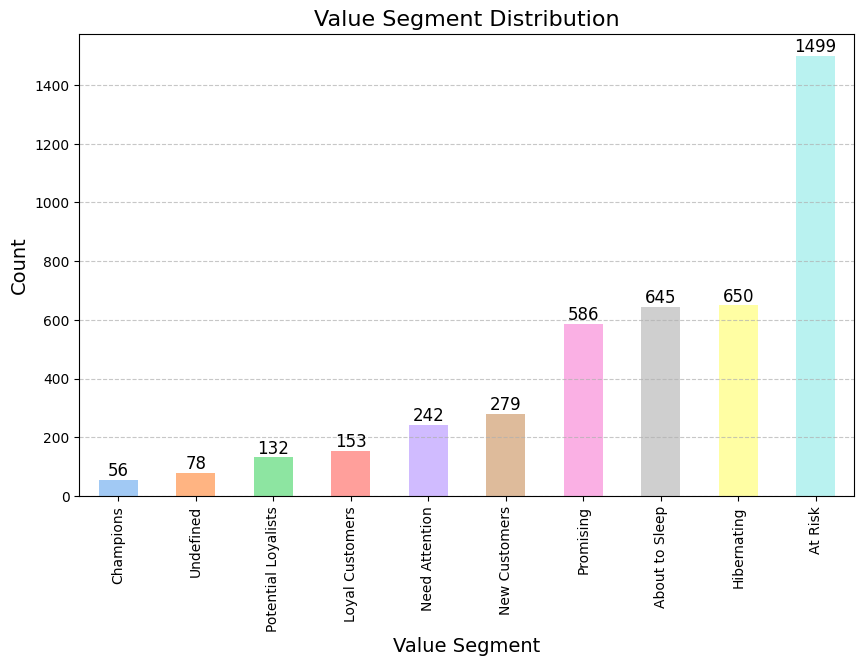

In [65]:
plt.figure(figsize=(10, 6))
ax = rfm['segment'].value_counts().sort_values().plot(kind='bar', color=sns.color_palette("pastel"))
ax.set_title('Value Segment Distribution', fontsize=16) 
ax.set_xlabel('Value Segment', fontsize=14)

ax.set_ylabel('Count', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7) 

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
segment_scores = rfm.groupby('segment')[['Recency', 'Frequency','Monetary']].mean().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(
x=segment_scores['segment'],
y=segment_scores['Recency'],
name='Recency Score',
marker_color='rgb(158,202,225)'
))
fig.add_trace(go.Bar(
x=segment_scores['segment'],
y=segment_scores['Frequency'],
name='Frequency Score',
marker_color='rgb(94,158,217)'
))
fig.add_trace(go.Bar(
x=segment_scores['segment'],
y=segment_scores['Monetary'],
name='Monetary Score',
marker_color='rgb(32,102,148)'
))
fig.update_layout(
title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
xaxis_title='RFM Segments',
yaxis_title='Score',
barmode='group',
showlegend=True
)
fig.show()